<a href="https://colab.research.google.com/github/109810022/bloodvessel-image/blob/main/01Frangi_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Apr 12 07:24:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Import package

In [ ]:
from skimage import data
from skimage import color
from skimage.filters import meijering, sato, frangi, hessian
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

Define Function

In [ ]:
def show(img_,text):
    print(text,img_.shape,np.amin(img_),np.amax(img_))
    plt.imshow(img_)
    plt.title(text,fontsize=20)
    plt.xlabel(str(img_.shape))
    plt.ylabel(str(np.amin(img_))+' ~ '+str(np.amax(img_)))
    return

raw image (512, 512, 3) 93 205


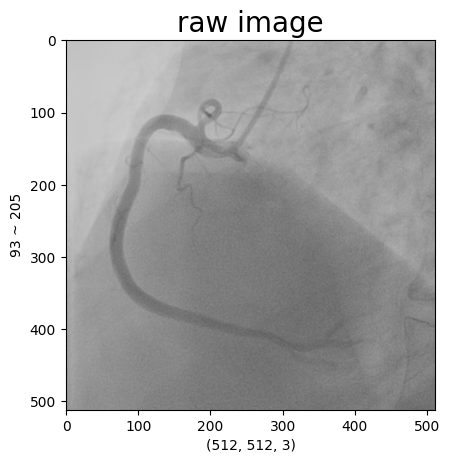

In [ ]:
raw_image = cv2.imread('/content/CVAI-0113_RCA_LAO56_CRA1_27.png')
show(raw_image,'raw image')

Filtering the vessels

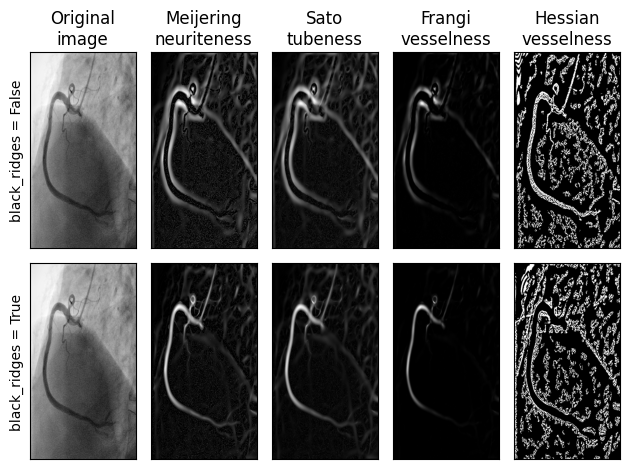

In [ ]:
def identity(image, **kwargs):
    """Return the original image, ignoring any kwargs."""
    return image
gray_image = cv2.cvtColor(raw_image, cv2.COLOR_RGB2GRAY)  
cmap = plt.cm.gray
fig, axes = plt.subplots(2, 5)

for i, black_ridges in enumerate([0, 1]):
    for j, func in enumerate([identity, meijering, sato, frangi, hessian]):
        result = func(gray_image,black_ridges=i)
        axes[i, j].imshow(result, cmap=cmap, aspect='auto')

        if i == 0:
            axes[i, j].set_title(['Original\nimage', 'Meijering\nneuriteness',
                                  'Sato\ntubeness', 'Frangi\nvesselness',
                                  'Hessian\nvesselness'][j])
        if j == 0:
            axes[i, j].set_ylabel('black_ridges = ' + str(bool(black_ridges)))
        # 儲存灰階圖
        if i >= 1:
            result = (result / np.max(result) * 255).astype(np.uint8)
            cv2.imwrite(str(func.__name__) + '_pred_img.jpg', result)

        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

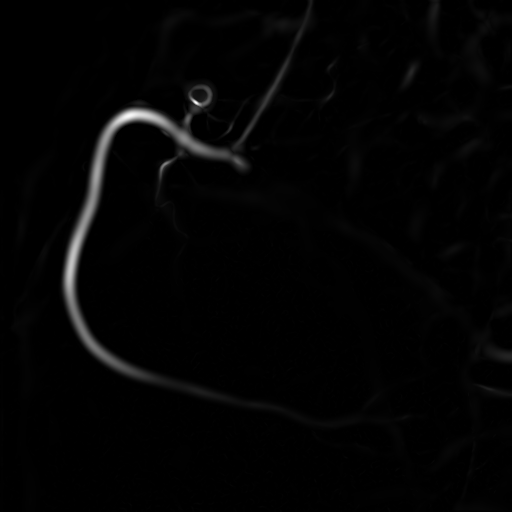

True

In [ ]:
# 設置Frangi濾波器的參數
frangi_params = {
    'sigmas' : range(1, 10, 2),
    'alpha': 0.5,
    'beta': 0.5,
    'gamma' : 0.5,
    'black_ridges': True,
    'mode': 'reflect',
    'cval': 0,
}

# 使用Frangi濾波器增強圖像中的細線型結構特徵
filtered = frangi(gray_image, **frangi_params)

# 調整圖像的對比度和亮度
filtered = cv2.normalize(filtered, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# 顯示結果圖像
cv2_imshow(filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 儲存灰階圖
filtered = (filtered / np.max(filtered) * 255).astype(np.uint8)
cv2.imwrite('test_pred_img.jpg', filtered)

Read test mask

test Mask (512, 512, 3) 0 253
test Mask (512, 512) 0.0 0.9921568627450981
test Mask (512, 512) 0.0 1.0


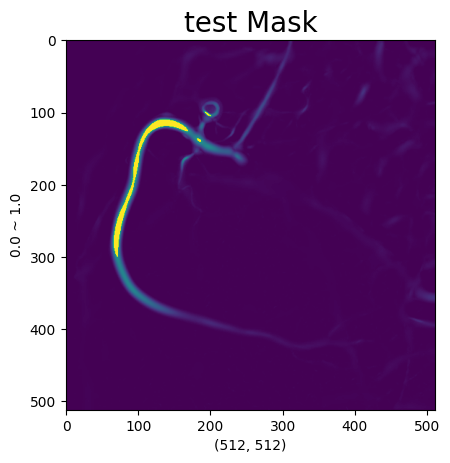

In [ ]:
pred_image = cv2.imread('/content/test_pred_img.jpg')
show(pred_image,'test Mask')
pred_mask = cv2.cvtColor(pred_image,cv2.COLOR_BGR2GRAY)
# # raw_mask = raw_mask.astype(np.float32)
pred_mask = pred_mask/255
show(pred_mask,'test Mask')
# # raw_mask = raw_mask.astype(np.uint8)
pred_mask[pred_mask>=0.5] = 1
pred_mask[pred_mask<0.] = 0
show(pred_mask,'test Mask')

Show test mask and raw image

raw image (512, 512, 3) 93 205
frangi filter (512, 512, 3) 0 253


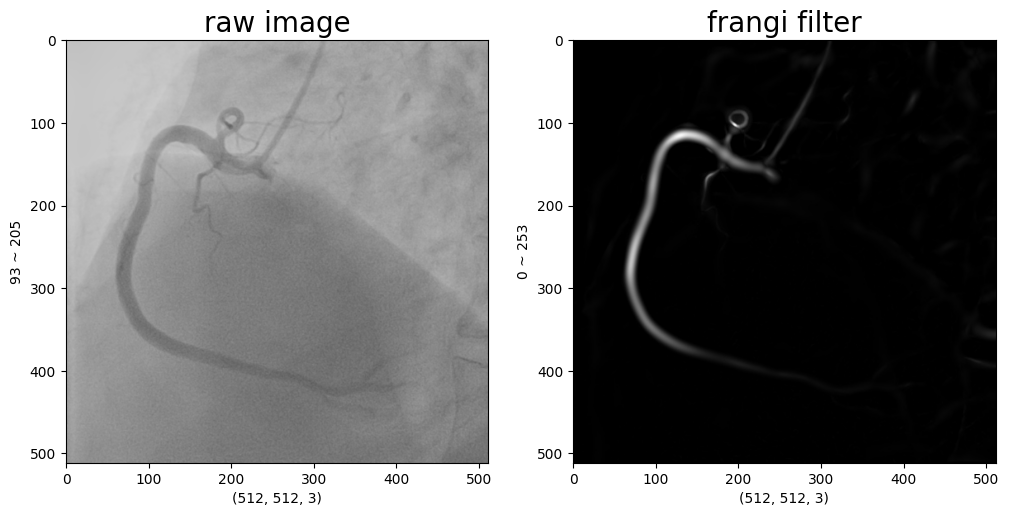

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
show(raw_image,'raw image')
plt.subplot(1,2,2)
show(pred_mask,'frangi filter')